Let's scrape all the players who played this season in the premier league from the website understat

In [1]:
import requests
import re
import json
import pandas as pd

# URL de la page à scraper
url = "https://understat.com/league/EPL"

# Faire une requête GET pour obtenir le contenu HTML
response = requests.get(url)
html = response.text

# Utiliser une expression régulière pour trouver les données JSON
pattern = r"playersData\s*=\s*JSON\.parse\('(.*?)'\);"
matches = re.search(pattern, html)

if matches:
    # Extraire et nettoyer les données JSON
    json_data = matches.group(1).encode('utf-8').decode('unicode_escape')
    players_data = json.loads(json_data)

    # Convertir en DataFrame pour une manipulation plus facile
    df = pd.DataFrame(players_data)

    # Afficher les colonnes disponibles
    print("Colonnes disponibles :", df.columns)

    # Sélectionner les colonnes importantes (vous pouvez personnaliser)
    selected_columns = ["player_name", "team_title", "games", "time", "goals", "assists", "xG", "xA"]
    epl_df = df[selected_columns]

    # Renommer les colonnes pour plus de lisibilité
    epl_df.columns = ["Joueur", "Équipe", "Matchs", "Minutes", "Buts", "Passes décisives", "xG", "xA"]

    # Afficher un aperçu du tableau
    print(epl_df.head())

    # Sauvegarder les données dans un fichier CSV
    epl_df.to_csv("EPL_players.csv", index=False, encoding="utf-8")
    print("Données sauvegardées dans 'EPL_players.csv'")
else:
    print("Impossible de trouver les données JSON.")

Colonnes disponibles : Index(['id', 'player_name', 'games', 'time', 'goals', 'xG', 'assists', 'xA',
       'shots', 'key_passes', 'yellow_cards', 'red_cards', 'position',
       'team_title', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')
           Joueur             Équipe Matchs Minutes Buts Passes décisives  \
0   Mohamed Salah          Liverpool     14    1237   13                8   
1  Erling Haaland    Manchester City     15    1350   13                1   
2     Cole Palmer            Chelsea     15    1320   11                6   
3      Chris Wood  Nottingham Forest     15    1180   10                0   
4    Bryan Mbeumo          Brentford     15    1349    9                2   

                   xG                  xA  
0    10.4297836124897   5.341094482690096  
1  14.533826172351837  1.5637084767222404  
2   8.798088733106852   6.733940728008747  
3    6.70914663374424  0.9723502080887556  
4   4.238191209733486  3.6385874673724174  
Données sauvegardée

In [2]:
epl_df

,Joueur,Équipe,Matchs,Minutes,Buts,Passes décisives,xG,xA
0,Mohamed Salah,Liverpool,14,1237,13,8,10.4297836124897,5.341094482690096
1,Erling Haaland,Manchester City,15,1350,13,1,14.533826172351837,1.5637084767222404
2,Cole Palmer,Chelsea,15,1320,11,6,8.798088733106852,6.733940728008747
3,Chris Wood,Nottingham Forest,15,1180,10,0,6.70914663374424,0.9723502080887556
4,Bryan Mbeumo,Brentford,15,1349,9,2,4.238191209733486,3.6385874673724174
...,...,...,...,...,...,...,...,...
474,Harry Clarke,Ipswich,4,197,0,0,0.056514352560043335,0
475,Ryan Manning,Southampton,8,619,0,0,0.15219078585505486,0.6510843932628632
476,Jahmai Simpson-Pusey,Manchester City,1,90,0,0,0,0
477,Thiago,Brentford,4,119,0,0,0.08866850286722183,0.11445537582039833


In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

Now, let's add some columns to visualize the minutes per match and the goals per match for each player

In [ ]:
# Ensure columns are numeric
epl_df['Minutes'] = pd.to_numeric(epl_df['Minutes'], errors='coerce')
epl_df['Matchs'] = pd.to_numeric(epl_df['Matchs'], errors='coerce')
epl_df['Buts'] = pd.to_numeric(epl_df['Buts'], errors='coerce')

# Calculate new columns
epl_df['MinsPerMatch'] = (epl_df['Minutes'] / epl_df['Matchs']).astype(int)
epl_df['GoalsPerMatch'] = (epl_df['Buts'] / epl_df['Matchs']).astype(float)

# Display the first few rows
epl_df.head()


In [6]:
epl_df

,Joueur,Équipe,Matchs,Minutes,Buts,Passes décisives,xG,xA,MinsPerMatch,GoalsPerMatch
0,Mohamed Salah,Liverpool,14,1237,13,8,10.4297836124897,5.341094482690096,88,0.928571
1,Erling Haaland,Manchester City,15,1350,13,1,14.533826172351837,1.5637084767222404,90,0.866667
2,Cole Palmer,Chelsea,15,1320,11,6,8.798088733106852,6.733940728008747,88,0.733333
3,Chris Wood,Nottingham Forest,15,1180,10,0,6.70914663374424,0.9723502080887556,78,0.666667
4,Bryan Mbeumo,Brentford,15,1349,9,2,4.238191209733486,3.6385874673724174,89,0.600000
...,...,...,...,...,...,...,...,...,...,...
474,Harry Clarke,Ipswich,4,197,0,0,0.056514352560043335,0,49,0.000000
475,Ryan Manning,Southampton,8,619,0,0,0.15219078585505486,0.6510843932628632,77,0.000000
476,Jahmai Simpson-Pusey,Manchester City,1,90,0,0,0,0,90,0.000000
477,Thiago,Brentford,4,119,0,0,0.08866850286722183,0.11445537582039833,29,0.000000


In [5]:
Total_Goals = epl_df['Buts'].sum()
print(Total_Goals)

437


In [10]:
# # Pie chart for penalties missed vs scored

# plt.figure(figsize = (13, 6))
# data = [Total_Goals, Total_Goals_Per_Match]
# labels = ['Total Goals', 'Total Goals Per Match']
# color_palette = sns.color_palette("Paired")
# plt.pie(data, labels = labels, colors = color_palette, autopct = '%.0f%%')
# plt.show()

<Axes: xlabel='Équipe'>

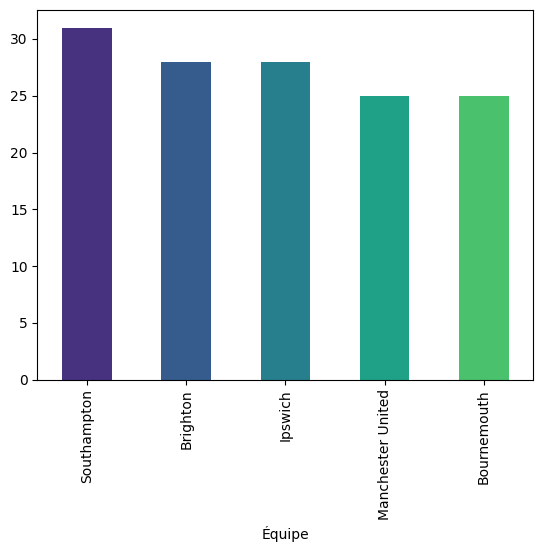

In [9]:
# Clubs with maximum players in their squad

epl_df['Équipe'].value_counts().nlargest(5).plot(kind = 'bar', color = sns.color_palette("viridis"))

<Axes: xlabel='Équipe'>

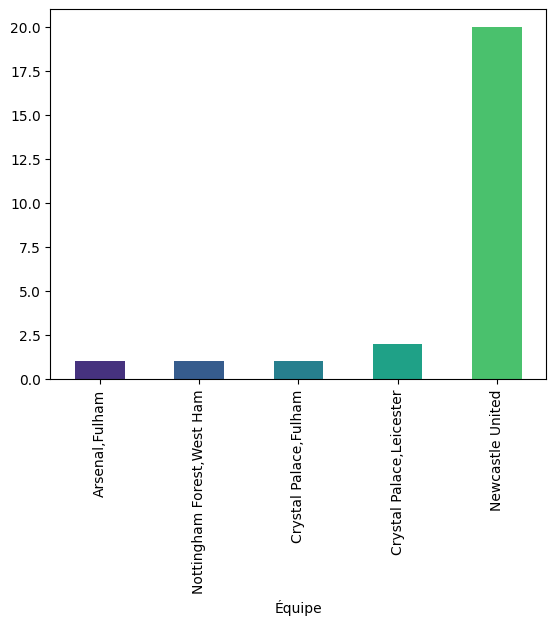

In [11]:
# Clubs with latest players in their squad

epl_df['Équipe'].value_counts().nsmallest(5).plot(kind = 'bar', color = sns.color_palette("viridis"))

<ipython-input-12-e161e42a1faa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'Équipe', y = 'Passes décisives', data = Assits_by_club.sort_values(by = 'Passes décisives'), palette = 'tab20')


Text(0.5, 1.0, 'Plot of Club vs Total Assists')

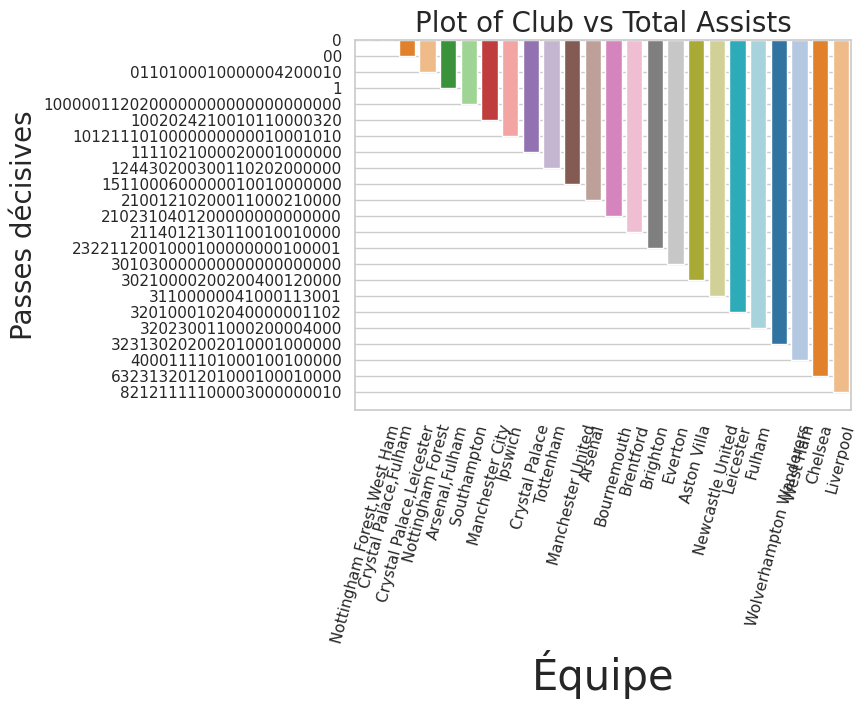

In [12]:
# Total assists from each club

Assits_by_club = pd.DataFrame(epl_df.groupby('Équipe', as_index = False)['Passes décisives'].sum())
sns.set_theme(style = "whitegrid", color_codes = True)
ax = sns.barplot(x = 'Équipe', y = 'Passes décisives', data = Assits_by_club.sort_values(by = 'Passes décisives'), palette = 'tab20')
ax.set_xlabel("Équipe", fontsize = 30)
ax.set_ylabel("Passes décisives", fontsize = 20)
plt.xticks(rotation = 75)
plt.rcParams["figure.figsize"] = (20, 8)
plt.title('Plot of Club vs Total Assists', fontsize = 20)

In [21]:
import pandas as pd

# Ensure 'Passes décisives' is numeric
epl_df['Passes décisives'] = pd.to_numeric(epl_df['Passes décisives'], errors='coerce')

# Drop rows with NaN values in 'Passes décisives' after conversion
epl_df = epl_df.dropna(subset=['Passes décisives'])

# Now get the top 10 assists
top_10_assists = epl_df[['Joueur', 'Équipe', 'Passes décisives', 'Matchs']].nlargest(n=10, columns='Passes décisives')
print(top_10_assists)

                 Joueur             Équipe  Passes décisives  Matchs
22          Bukayo Saka            Arsenal                10      14
0         Mohamed Salah          Liverpool                 8      14
2           Cole Palmer            Chelsea                 6      15
133  Amad Diallo Traore  Manchester United                 6      13
38      Bruno Fernandes  Manchester United                 5      15
20       James Maddison          Tottenham                 4      15
26        Son Heung-Min          Tottenham                 4      12
28         Jarrod Bowen           West Ham                 4      15
79     Mikkel Damsgaard          Brentford                 4      15
109      Bernardo Silva    Manchester City                 4      15


<ipython-input-21-1c05ad80e788>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl_df['Passes décisives'] = pd.to_numeric(epl_df['Passes décisives'], errors='coerce')


<ipython-input-22-b76dff6672b1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'Équipe', y = 'Buts', data = Goals_by_clubs.sort_values(by ="Buts"), palette = 'rocket')


Text(0.5, 1.0, 'Plot of Club vs Total Goals')

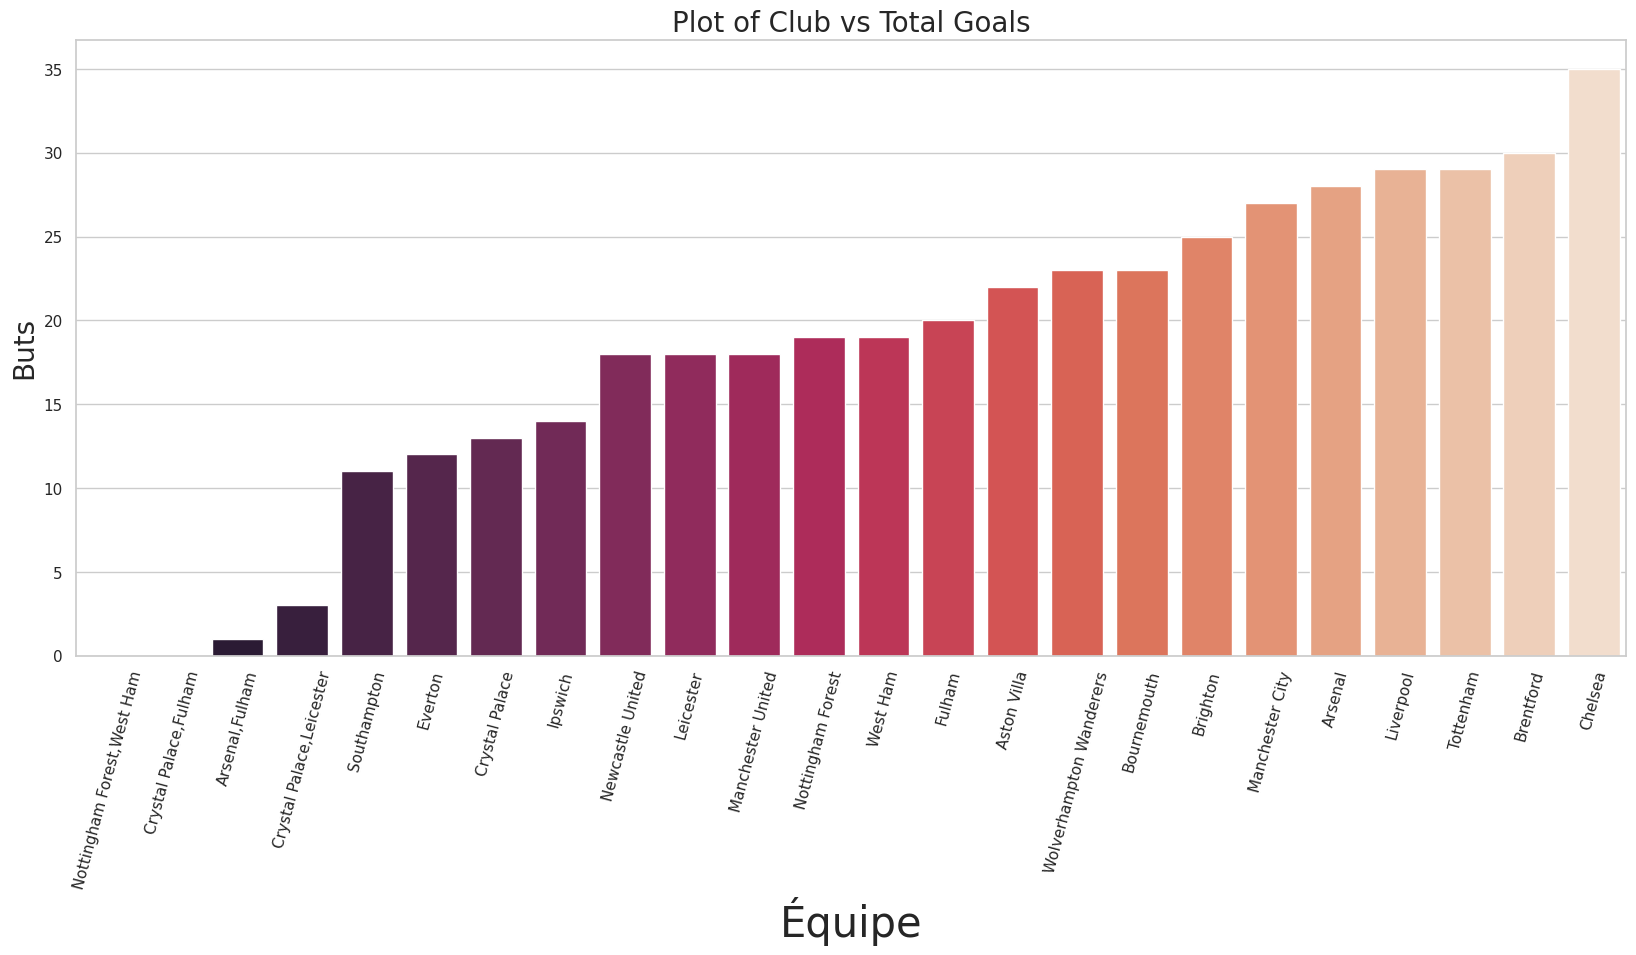

In [22]:
# Creating a DataFrame to group the total goals scored by each club

Goals_by_clubs = pd.DataFrame(epl_df.groupby('Équipe', as_index = False)['Buts'].sum())
sns.set_theme(style ="whitegrid", color_codes = True)
ax = sns.barplot(x = 'Équipe', y = 'Buts', data = Goals_by_clubs.sort_values(by ="Buts"), palette = 'rocket')
ax.set_xlabel("Équipe", fontsize = 30)
ax.set_ylabel("Buts", fontsize = 20)
plt.xticks(rotation =75)
plt.rcParams["figure.figsize"] = (20, 8)
plt.title('Plot of Club vs Total Goals', fontsize = 20)

In [23]:
# Most goals by players

top_10_goals = epl_df[['Joueur', 'Équipe', 'Buts', 'Matchs']].nlargest(n = 10, columns = 'Buts')
top_10_goals

,Joueur,Équipe,Buts,Matchs
0,Mohamed Salah,Liverpool,13,14
1,Erling Haaland,Manchester City,13,15
2,Cole Palmer,Chelsea,11,15
3,Chris Wood,Nottingham Forest,10,15
4,Bryan Mbeumo,Brentford,9,15
5,Yoane Wissa,Brentford,8,12
6,Nicolas Jackson,Chelsea,8,14
7,Matheus Cunha,Wolverhampton Wanderers,7,15
8,Ollie Watkins,Aston Villa,7,15
9,Danny Welbeck,Brighton,6,14


In [25]:
# Goals per match

top_10_goals_per_match = epl_df[['Joueur', 'Équipe', 'GoalsPerMatch', 'Matchs', 'Buts']].nlargest(n = 10, columns = 'GoalsPerMatch')
top_10_goals_per_match

,Joueur,Équipe,GoalsPerMatch,Matchs,Buts
0,Mohamed Salah,Liverpool,0.928571,14,13
1,Erling Haaland,Manchester City,0.866667,15,13
2,Cole Palmer,Chelsea,0.733333,15,11
3,Chris Wood,Nottingham Forest,0.666667,15,10
5,Yoane Wissa,Brentford,0.666667,12,8
4,Bryan Mbeumo,Brentford,0.600000,15,9
6,Nicolas Jackson,Chelsea,0.571429,14,8
7,Matheus Cunha,Wolverhampton Wanderers,0.466667,15,7
8,Ollie Watkins,Aston Villa,0.466667,15,7
11,Alexander Isak,Newcastle United,0.461538,13,6


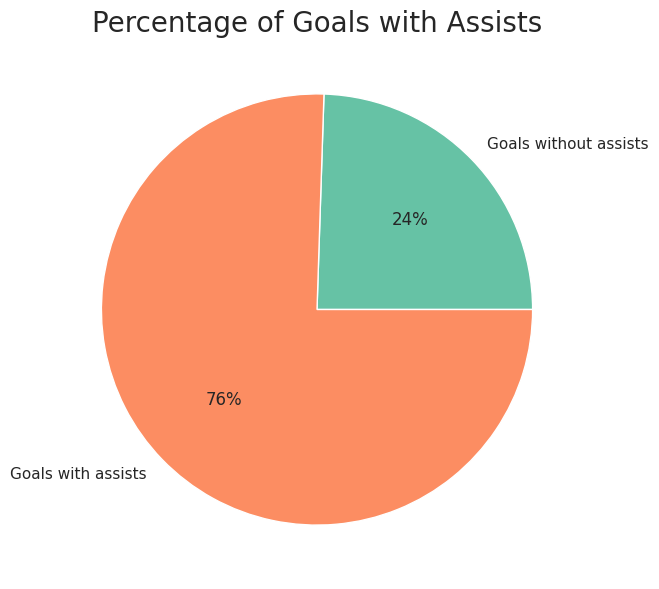

In [26]:
# Pie Chart - Goals with assist and without assist

plt.figure(figsize = (14, 7))
assists = epl_df['Passes décisives'].sum()
data = [Total_Goals - assists, assists]
labels = ['Goals without assists', 'Goals with assists']
color = sns.color_palette('Set2')
plt.pie(data, labels = labels, colors = color, autopct ='%.0f%%')
plt.title('Percentage of Goals with Assists', fontsize = 20)
plt.show()